pip install numpy  
pip install pandas  
pip install openpyxl  
pip install tqdm  
pip install ffmpeg  
pip install pydub  
conda install -c conda-forge librosa  
pip install -U praat-parselmouth  
pip install lime
pip install spacy  
pip install intel-openmp  
pip install spacy-transformers

python3 -m spacy download fr_dep_news_trf  

Please restart the kernel after installing everything

In [1]:
import pandas as pd
import pydub
from tqdm import tqdm
import os
from utils import get_end_from_start, get_start_end_from_file
from data import read_interview
import matplotlib.pyplot as plt

pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe" #CHANGE THIS

# Loading videos and computing features

In [ ]:
video_folder = 'videos/'
df_name = 'notes_entretiens_all.xlsx'

filenames = tqdm(os.listdir(video_folder))
df_startend = get_start_end_from_file(df_name)

interviews = []
for f in filenames : 
    interviews.append(read_interview(video_folder,df_startend,f))

# Extracting features and creating a Pandas dataframe

In [5]:
from data import get_features

feats = [item for sublist in interviews for item in sublist]
feats = get_features(feats)

In [6]:
# Saving features so we don't have to recalculate everything
feats.to_csv("audio_lexic.csv")

In [3]:
# Loading features from CSV
import pandas as pd
feats = pd.read_csv('audio_lexic.csv')
feats = feats.set_index('id')

# Analysis

In [2]:
# Categorizing scoring questions
voix = ['Q1','Q2','Q4']
texte = ['Q5','Q6']
visuel = ['Q3','Q7','Q8','Q21']
discours = ['Q9','Q10','Q11','Q13','Q17']
motivation = ['Q14','Q15']
impression = ['Q12','Q16','Q18','Q19','Q20']

In [4]:
# Creating label dataframe
from data import get_scores, merge_scores_feats
df_name = 'notes_entretiens_all.xlsx'

scores = get_scores(df_name)

feats, scores = merge_scores_feats(scores,feats)

# Correlation analysis

<AxesSubplot:>

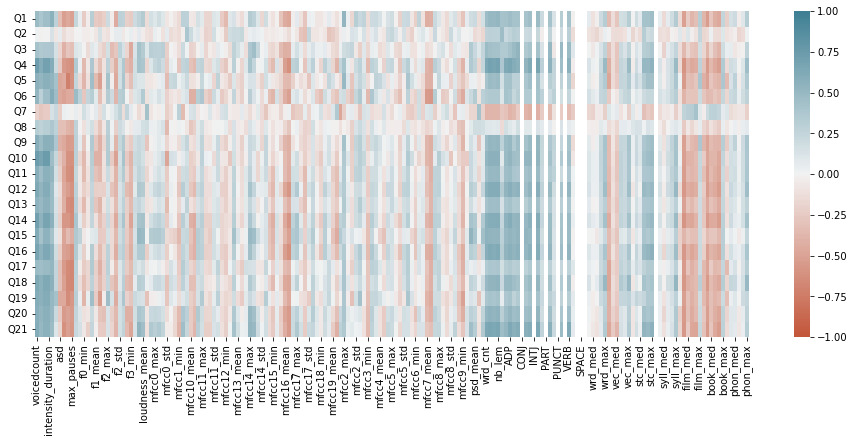

In [6]:
import seaborn as sns
cormat = pd.concat([feats, scores], axis=1).corr()

cormat = cormat.loc[scores.columns,feats.columns]

plt.figure(figsize=(16, 6))

sns.heatmap(cormat, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=200))

#visualize linear correlations between scoring questions and calculated features

In [9]:
# Visualizing only abs(correlations) > 0.6
cormat[abs(cormat)>0.6].dropna(axis=0,how='all').dropna(axis=1,how='all').round(2).transpose()

,Q4,Q5,Q6,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21
voicedcount,0.72,NaN,NaN,0.73,NaN,0.62,NaN,0.70,0.61,0.67,NaN,0.62,NaN,NaN
npause,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
originaldur,0.69,NaN,NaN,0.74,NaN,0.61,NaN,0.67,NaN,0.64,NaN,0.62,0.61,NaN
intensity_duration,0.69,NaN,NaN,0.74,NaN,0.61,NaN,0.67,NaN,0.64,NaN,0.62,0.61,NaN
speakingrate,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_pauses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.61
mean_pauses,NaN,-0.71,NaN,-0.60,-0.63,NaN,-0.63,NaN,NaN,NaN,-0.66,-0.67,-0.64,NaN
max_pauses,-0.62,-0.60,NaN,-0.62,-0.65,-0.61,-0.67,-0.64,NaN,-0.60,-0.68,-0.67,NaN,NaN
mfcc16_min,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,NaN,NaN,NaN,NaN
wrd_cnt,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64


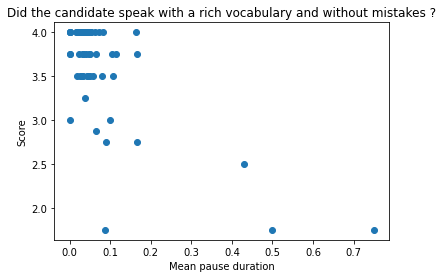

In [55]:
#Example: how does the mean pause duration relate to vocabulary score

plt.scatter(feats['mean_pauses'],scores['Q5'])
plt.xlabel('Mean pause duration')
plt.ylabel('Score')
plt.title('Did the candidate speak with a rich vocabulary and without mistakes ?');

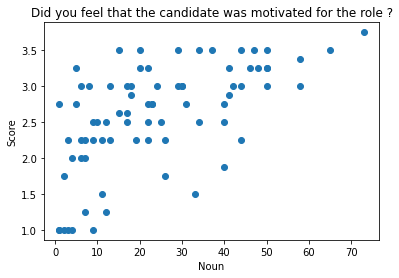

In [56]:
plt.scatter(feats['NOUN'],scores['Q14'])
plt.xlabel('Number of nouns')
plt.ylabel('Score')
plt.title('Did you feel that the candidate was motivated for the role ?');

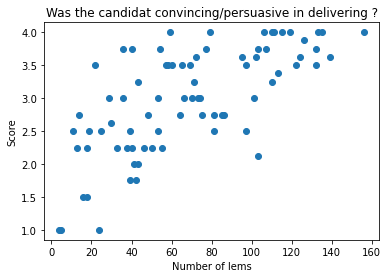

In [57]:
plt.scatter(feats['nb_lem'],scores['Q4'])
plt.xlabel('Number of lems')
plt.ylabel('Score')
plt.title('Was the candidat convincing/persuasive in delivering ?');

# PCA

In [30]:
# Pseudonimisation
import hashlib
feats_pca = feats.copy()
feats_pca['email'] = list(map(lambda s : s.split('_')[0],feats_pca.index.values))
feats_pca['question'] = list(map(lambda s : s.split('_')[1],feats_pca.index.values))


feats_pca['email'] = list(map(lambda e : hashlib.md5(e.encode()).hexdigest()[:5],feats_pca.email))
feats_pca['email'] = feats_pca.apply(lambda s : s.email+'_'+s.question,axis=1)
feats_pca = feats_pca.set_index('email').drop(columns=['question'])

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


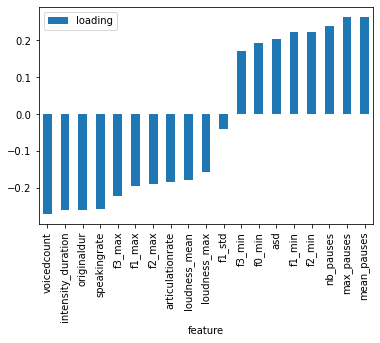

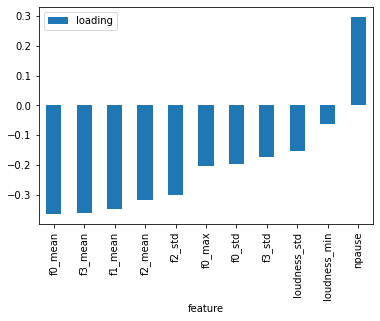

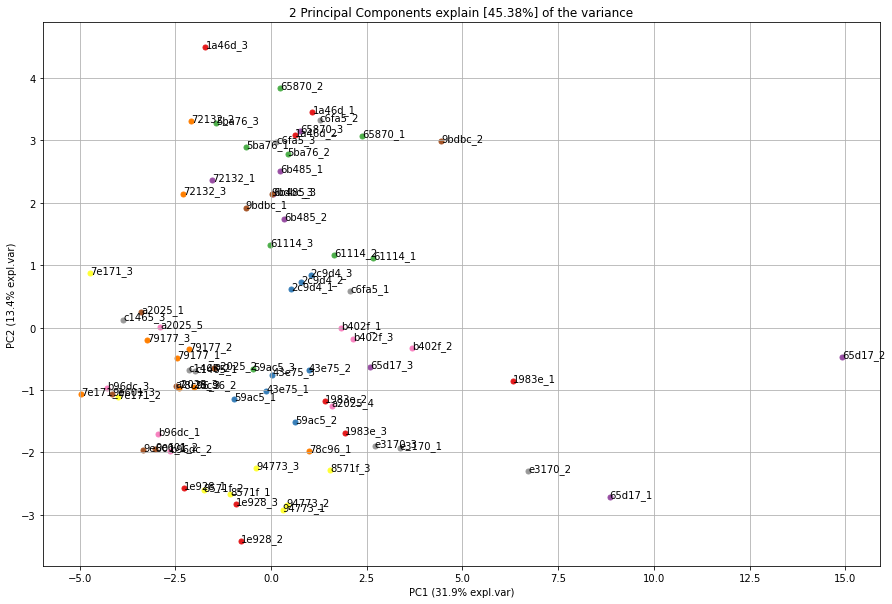

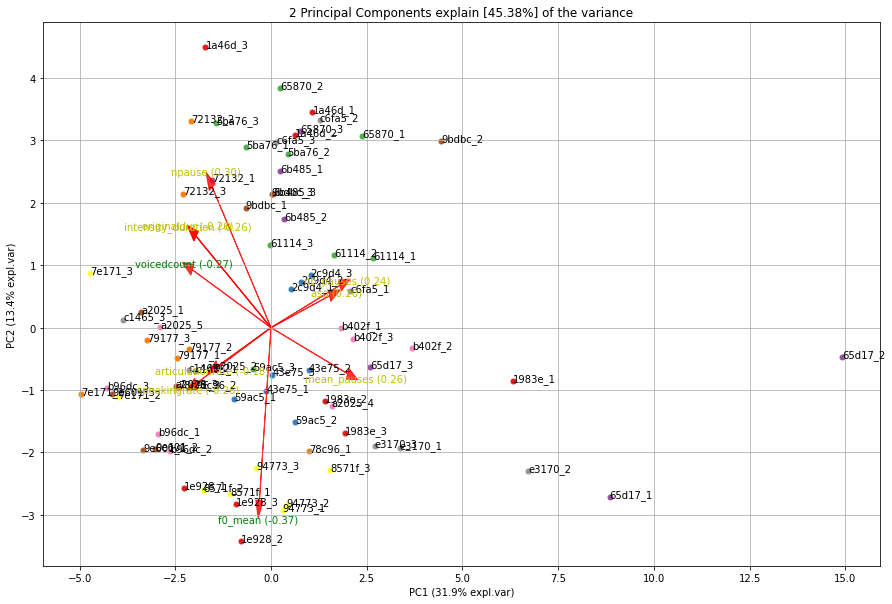

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'PC2')

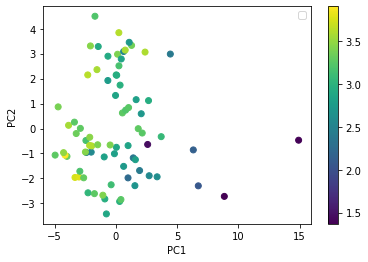

In [31]:
from pca import pca

score = scores.mean(axis=1)

pca_m = pca(n_components=2,normalize=True)

features_pca = pca_m.fit_transform(feats_pca.iloc[:,:30])

pca_m.compute_topfeat().sort_values('loading').groupby('PC').plot.bar('feature','loading')

# Scatter first 2 PCs
fig, ax = pca_m.scatter(legend=False)

# Make biplot with the number of features
fig, ax = pca_m.biplot(n_feat=10,legend=False,label=True)

import matplotlib.pyplot as plt
plt.scatter(features_pca['PC']['PC1'],features_pca['PC']['PC2'],c=score)
plt.colorbar()
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

# Score relevance importance

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(feats,scores,test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

voix = ['Q1','Q2','Q4']
texte = ['Q5','Q6']
visuel = ['Q3','Q7','Q8','Q21']
discours = ['Q9','Q10','Q11','Q13','Q17']
motivation = ['Q14','Q15']
impression = ['Q12','Q16','Q18','Q19','Q20']
best_scores = voix+texte+visuel+discours+motivation+impression

mse = []
model = RandomForestRegressor()
for q in best_scores:
    y_tr = y_train[q]
    y_te = y_test[q]

    model.fit(X_train,y_tr)
    mse.append(mean_squared_error(model.predict(X_test),y_te))

Text(0.5, 0, 'MSE')

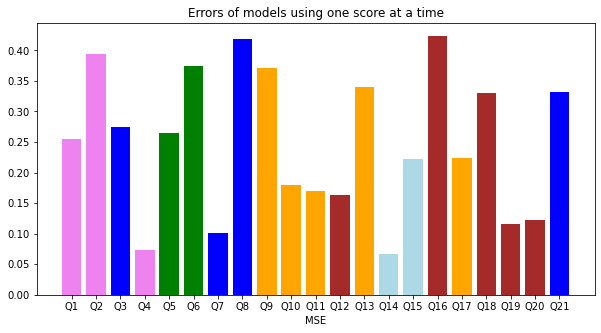

In [60]:
def color(c):
    if c in voix:
        return 'violet'
    elif c in texte:
        return 'g'
    elif c in visuel:
        return 'b'
    elif c in discours:
        return 'orange'
    elif c in motivation:
        return 'lightblue'
    else:
        return 'brown'
    
colors = pd.DataFrame()
colors['column'] = ['Q'+str(i+1) for i in range(len(best_scores))]
colors['col'] = colors.apply(lambda c: color(c.column),axis=1)

plt.figure(figsize=(10,5))
plt.bar(['Q'+str(i+1) for i in range(len(best_scores))],mse, color=colors['col'])
plt.title('Errors of models using one score at a time')
plt.xlabel('Question')
plt.xlabel('MSE')

# Multi-label classification

#### Données

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler


# Getting rid of useless scores
voix = ['Q1','Q4']
texte = ['Q5','Q6']
visuel = []
discours = ['Q9','Q10','Q11','Q13','Q17']
motivation = ['Q14']
impression = ['Q12','Q16','Q18','Q19']
best_scores = voix+texte+visuel+discours+motivation+impression

score = scores.copy()
score['voix'] = score[voix].mean(axis=1)
score['texte'] = score[texte].mean(axis=1)
score['discours'] = score[discours].mean(axis=1)
score['motivation'] = score[motivation].mean(axis=1)
score['impression'] = score[impression].mean(axis=1)
score['all'] = score[best_scores].mean(axis=1)

score = score[['voix','texte','discours','motivation','impression','all']]

#### RF Regression

In [142]:
X_train, X_test, y_train, y_test = train_test_split(feats,score,test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=50,max_depth=50)
model.fit(X_train,y_train)

metric = mean_squared_error

predictions = np.stack(model.predict(X_train))
print([round(metric(np.array(y_train)[:,i],predictions[:,i]),2) for i in range(score.shape[1])])

predictions = np.stack(model.predict(X_test))
print([round(metric(np.array(y_test)[:,i],predictions[:,i]),2) for i in range(score.shape[1])])

[0.04, 0.02, 0.04, 0.04, 0.03, 0.03]
[0.17, 0.09, 0.07, 0.21, 0.1, 0.07]


#### RF Classification

In [152]:
X_train, X_test, y_train, y_test = train_test_split(feats,score.round(),test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=20,max_depth=50,))
model.fit(X_train,y_train)

metric = accuracy_score

predictions = np.stack(model.predict(X_train))
print([round(metric(np.array(y_train)[:,i],predictions[:,i]),2) for i in range(score.shape[1])])

predictions1 = np.stack(model.predict(X_test))
print([round(metric(np.array(y_test)[:,i],predictions1[:,i]),2) for i in range(score.shape[1])])

NameError: name 'MultiOutputClassifier' is not defined

#### SVM Classification

In [183]:
model = MultiOutputClassifier(SVC(C=10,kernel="linear"))

model.fit(X_train,y_train)

metric =  accuracy_score

predictions = np.stack(model.predict(X_train))
print([round(metric(np.array(y_train)[:,i],predictions[:,i]),2) for i in range(score.shape[1])])

predictions2 = np.stack(model.predict(X_test))
print([round(metric(np.array(y_test)[:,i],predictions2[:,i]),2) for i in range(score.shape[1])])


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.62, 0.44, 0.62, 0.5, 0.75, 0.75]


#### MLP Classification

In [184]:
model = MultiOutputClassifier(MLPClassifier(activation="relu",hidden_layer_sizes=1000,learning_rate_init=0.001,
                                early_stopping=True,validation_fraction=0.1,alpha=1,batch_size=10))
model.fit(X_train,y_train)

metric =  accuracy_score

predictions = np.stack(model.predict(X_train))
acc = [round(metric(np.array(y_train)[:,i],predictions[:,i]),2) for i in range(score.shape[1])]

print(acc)
print(np.mean(acc))

predictions3 = np.stack(model.predict(X_test))
acc = [round(metric(np.array(y_test)[:,i],predictions3[:,i]),2) for i in range(score.shape[1])]

print(acc)
print(np.mean(acc))

[0.97, 0.95, 0.98, 0.79, 0.82, 0.95]
0.91
[0.56, 0.5, 0.56, 0.5, 0.81, 0.69]
0.6033333333333334


#### Majority score

In [ ]:
def choice(scores):
    for s
        max(scores,key=lst.count)

In [201]:
predictions = np.stack([predictions1,predictions2,predictions3],axis=-1)

In [203]:
final_predictions = np.zeros(predictions.shape[:2])
for example in range(predictions.shape[0]):
    for s in range(predictions.shape[1]):
        counts = np.bincount(predictions[example,s,:].astype(int))
        best = np.argmax(counts)
        final_predictions[example,s] = best

In [204]:
final_predictions.shape

(16, 6)

In [205]:
acc = [round(metric(np.array(y_test)[:,i],final_predictions[:,i]),2) for i in range(score.shape[1])]

print(acc)
print(np.mean(acc))

[0.56, 0.44, 0.81, 0.56, 0.75, 0.81]
0.655


# Explainability

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feats,score['all'].round(),test_size=0.2, random_state=42)
scaler = StandardScaler()

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

#model = MLPClassifier(activation="relu",hidden_layer_sizes=2000,
#        learning_rate_init=0.001,early_stopping=True,validation_fraction=0.1,
#        alpha = 0.1, batch_size=10)

model = Pipeline([('scaler',scaler),('model',RandomForestClassifier(n_estimators=20,max_depth=50))])

model.fit(X_train,y_train)


metric =  accuracy_score

predictions = model.predict(X_train)
print(round(metric(np.array(y_train),predictions),2))

predictions = model.predict(X_test)
print(round(metric(np.array(y_test),predictions),2))

1.0
0.75


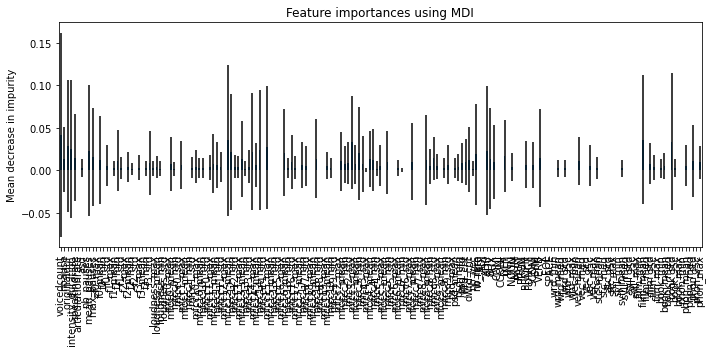

In [35]:
#Feature importance
importances = model.__getitem__('model').feature_importances_
forest_importances = pd.Series(importances, index=feats.columns)
std = np.std([tree.feature_importances_ for tree in model.__getitem__('model').estimators_], axis=0)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
#Explainability
from lime import lime_tabular    

explainer = lime_tabular.LimeTabularExplainer(feats.values,feature_names=feats.columns, class_names=['1','2','3','4'],
    mode='classification')


# asking for explanation for LIME model
i = np.random.randint(0, feats.shape[0])
exp = explainer.explain_instance(feats.iloc[i,:], model.predict_proba, top_labels=1)

C:\Users\Kinza\anaconda3\envs\pie\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
exp.show_in_notebook(show_table=True, show_all=False)